# Regresión logística
---
Vamos a intentar clasificar las diferentes clases del dataset *mnist* usando una regresión logística.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


In [10]:
mnist = fetch_openml('mnist_784')

In [ ]:
mnist.keys()

(56000, 784)
(14000, 784)


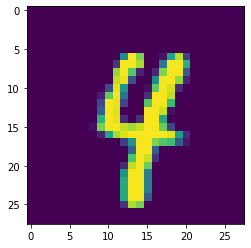

In [3]:
from sklearn.model_selection import train_test_split
import math
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=33)
print(X_train.shape)
print(X_test.shape)
#Mostramos una imagen del conjunto de datos
size = int(math.sqrt(X_train.shape[1]));
plt.imshow(X_train[33].reshape(size, size));